In [40]:
# Install packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [65]:
# Plot settings
sns.set_context('notebook') # optimise figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
# read input file

df = pd.read_csv('Data\Employees.csv')
df.describe()

,Experience,Salary
count,208.000000,208.000000
mean,12.048077,79843.846154
std,7.314706,22512.307844
min,2.000000,53400.000000
25%,7.000000,66000.000000
50%,10.000000,74000.000000
75%,16.000000,88000.000000
max,39.000000,194000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 3 columns):
Gender        208 non-null object
Experience    208 non-null int64
Salary        208 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.0+ KB


In [13]:
df.isnull().sum(axis=0)
df.head(5)
df.tail(5)

,Gender,Experience,Salary
203,Male,39,148000
204,Male,34,190000
205,Male,36,194000
206,Male,32,176000
207,Male,35,188000


In [22]:
from sklearn.model_selection import train_test_split

# randomly split indexes

train_index, test_index = train_test_split(np.array(df.index), train_size = 0.7, random_state = 123)
train = df.loc[train_index,:].copy()
test = df.loc[test_index,:].copy()

train.head(5)

,Gender,Experience,Salary
183,Male,7,95000
171,Male,11,88000
91,Female,6,80000
79,Female,10,69200
81,Female,7,75000


In [23]:
print(train_index)

[183 171  91  79  81 130 159 163 172   8 158  77 108  36  63  28  13 168
  88 157  44 132 187 107  60   7  30 185 119 139  29  35   0 142  45 144
  40  59 154  46 150   5  16 177  65 152 173  74 110  61 203  38  27  54
 141 190 189 170 149  87   9   6 167 120 151 147 133 204 148  67   3  86
 143  48 117  51   1  18  12 184  56  25 101  43 129 103  14 134 115 207
  70  15 146  22 138  58  75  64  69 201 131  76  34 155  94 118  97 102
  92 124  99 105 135 176 195 181 205  39  84   2  55  49  68 198 164  78
 202 153 111 174  32  73  47 206 113  96  57 123 106  83  17  98  66 126
 109]


In [37]:
# EDA

df.groupby('Gender')['Salary'].describe().round(2)

Gender       
Female  count       140.00
        mean      74419.86
        std       13421.73
        min       53600.00
        25%       65150.00
        50%       70900.00
        75%       83100.00
        max      123600.00
Male    count        68.00
        mean      91010.88
        std       31686.44
        min       53400.00
        25%       68750.00
        50%       85000.00
        75%       97250.00
        max      194000.00
Name: Salary, dtype: float64

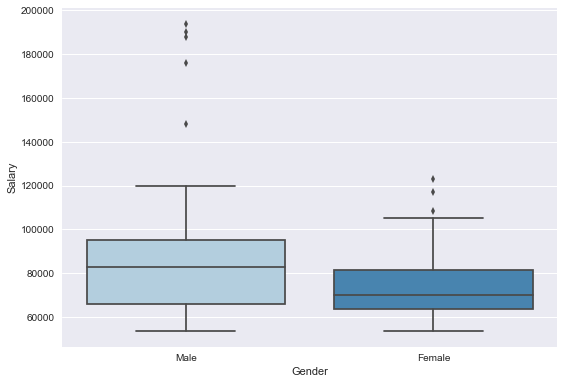

In [44]:
sns.boxplot(x = 'Gender', y = 'Salary', data = train, palette = 'Blues')
plt.tight_layout()
plt.show()

C:\Users\Solaikarthick\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


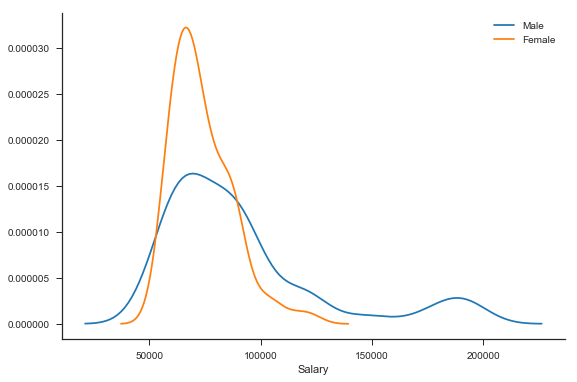

In [68]:
# Distribution plot
sns.distplot(train.loc[train['Gender'] == 'Male','Salary'], hist = False, label = 'Male')
sns.distplot(train.loc[train['Gender'] == 'Female','Salary'], hist = False, label = 'Female')
sns.despine()
plt.show()

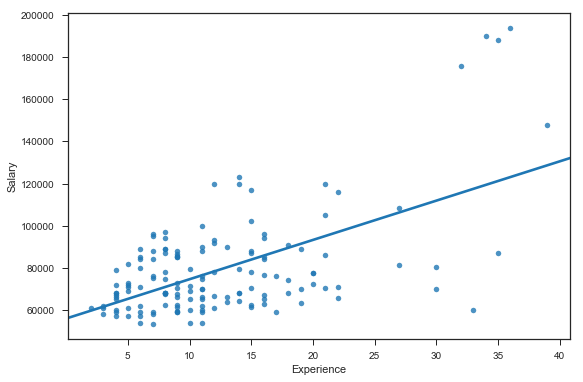

In [67]:
sns.regplot(train['Experience'], train['Salary'], scatter_kws={'s':30}, ci=None)
plt.show()

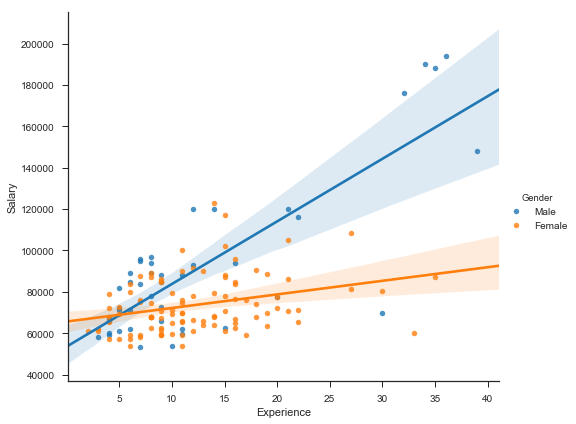

In [66]:
sns.lmplot('Experience','Salary', data=train, hue='Gender', size=6, aspect=1.2,scatter_kws={'s':30})
plt.show()

In [69]:
# Create dummy variable for Female
def data_prep(df):
    df['Female'] = (df['Gender'] == 'Female').astype(int)
    return df

train = data_prep(train)
test = data_prep(test)
train.head(5)


,Gender,Experience,Salary,Female
183,Male,7,95000,0
171,Male,11,88000,0
91,Female,6,80000,1
79,Female,10,69200,1
81,Female,7,75000,1


In [71]:
import statsmodels.formula.api as smf

fxn = 'Salary ~ Female + Experience'
ols = smf.ols(formula=fxn, data=train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     56.07
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           1.13e-18
Time:                        21:53:08   Log-Likelihood:                -1628.4
No. Observations:                 145   AIC:                             3263.
Df Residuals:                     142   BIC:                             3272.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    6.79e+04   3733.794     18.186      0.0

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Model 1
fxn = 'Salary ~ Female + Experience'
ols = smf.ols(formula=fxn, data=train).fit()
predictions = ols.predict(test)
print(predictions)

[  82812.69284975   67488.27178975   80536.03534328   75356.82796201
   77220.79418395   65624.30556782   60032.40690202   73080.17045555
   60032.40690202   91719.83267488   75356.82796201   75356.82796201
   90268.55773748   75356.82796201   75356.82796201   76808.10289942
   61896.37312395  118228.05106648   86127.93400908   74944.13667748
   58168.44068008  110772.18617874   73492.86174008   84263.96778715
   78672.06912135   86540.62529361   80536.03534328   60032.40690202
   65624.30556782   61896.37312395   80536.03534328   61896.37312395
   67488.27178975  110772.18617874   80536.03534328   69352.23801168
   82812.69284975   76808.10289942   58168.44068008  105180.28751294
   78672.06912135  107044.25373488   82400.00156521   77220.79418395
   78672.06912135   77220.79418395   63760.33934588   75356.82796201
   86540.62529361   78672.06912135   61896.37312395  101452.35506908
   91719.83267488   56304.47445815   92132.52395941   71216.20423362
  110772.18617874   71216.20423362

In [81]:
rmse = []
r2 = []

# Model 1
rmse.append(np.sqrt(mean_squared_error(test['Salary'],predictions)))
r2.append(r2_score(test['Salary'],predictions))

# Model 2
fxn = 'Salary ~ Female + Experience + Experience:Female'
ols = smf.ols(formula=fxn, data=train).fit()
predictions = ols.predict(test)
rmse.append(np.sqrt(mean_squared_error(test['Salary'],predictions)))
r2.append(r2_score(test['Salary'],predictions))

# Model 3
fxn = 'np.log(Salary) ~ Female + Experience'
ols = smf.ols(formula=fxn, data=train).fit()
predictions = ols.predict(test)
rmse.append(np.sqrt(mean_squared_error(test['Salary'],predictions)))
r2.append(r2_score(test['Salary'],predictions))

# Model 4
fxn = 'np.log(Salary) ~ Female + Experience + Experience:Female'
ols = smf.ols(formula=fxn, data=train).fit()
predictions = ols.predict(test)
rmse.append(np.sqrt(mean_squared_error(test['Salary'],predictions)))
r2.append(r2_score(test['Salary'],predictions))



In [87]:
print(rmse)
print(r2)

[83323.911562081747, 13043.407925689015, 83597.458068011518, 83597.455653005658]
[-23.105629674041765, 0.40930766491934178, -23.264163628632812, -23.264162226721851]


In [93]:
# Display results

cols = ['RMSE', 'R2_score']
rows = ['Base Model', 'Interaction', 'Log transform', 'Log transform + Interaction']

table = pd.DataFrame(0.0, columns = cols, index = rows) # Intialise with 0.0 

for i in range(4):
    table.iloc[i,0] = rmse[i]
    table.iloc[i,1] = r2[i]

table.round(2)

,RMSE,R2_score
Base Model,83323.91,-23.11
Interaction,13043.41,0.41
Log transform,83597.46,-23.26
Log transform + Interaction,83597.46,-23.26
